# Descripttion: 
This uses an artificial recurrent neyral network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60day stock price

In [1]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# get data
# data = pd.read_csv('./Processing_Historical_Data/Dow_Jones/AAPL.csv')
# data

In [3]:
# Extract data from my local machine

# Replace 'your_file_name.csv' with the actual name of your CSV file
file_name = 'MSFT'

# Construct the full file path by joining the directory path and the file name
file_path = 'D:\Programming\Stock Selections\Stock-Selection-Using-ML\Processing_Historical_Data\Dow_Jones' + '\\' + file_name +'.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# # Set the display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the DataFrame
print(data)


            Date    Open    High     Low   Close  Adj Close    Volume
0     2019-01-02   99.55  101.75   98.94  101.12      96.02  35329300
1     2019-01-03  100.09  100.19   97.19   97.40      92.49  42579100
2     2019-01-04   99.72  102.51   98.93  101.93      96.79  44060600
3     2019-01-07  101.63  103.26  100.98  102.05      96.91  35656100
4     2019-01-08  103.04  103.97  101.70  102.80      97.61  31514400
...          ...     ...     ...     ...     ...        ...       ...
1226  2023-11-14  371.01  371.95  367.35  370.26     369.51  27683900
1227  2023-11-15  371.27  373.13  367.10  369.67     369.67  26860100
1228  2023-11-16  370.95  376.35  370.17  376.17     376.17  27182300
1229  2023-11-17  373.60  374.36  367.00  369.85     369.85  40157000
1230  2023-11-20  371.22  378.86  371.00  377.44     377.44  52465100

[1231 rows x 7 columns]


Get the number of rows and column in the data set

In [4]:
data.shape


(1231, 7)

From this code, we got to know that there are 1231 rows of data available and for each row, we have 7 different features or columns.

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,125.685979,127.028668,124.283501,125.673631,114.282502,9.600384e+06
std,31.127623,31.323497,30.908091,31.143852,34.103861,5.046565e+06
min,55.250000,58.490000,51.590000,54.220000,45.810000,1.640100e+06
25%,102.225000,103.275000,101.345000,102.155000,90.860000,6.593200e+06
50%,119.080000,119.860000,118.130000,119.090000,99.910000,8.563100e+06
75%,157.295000,159.330000,155.700000,157.200000,151.710000,1.092800e+07
max,187.110000,189.670000,186.170000,188.050000,180.690000,5.723100e+07


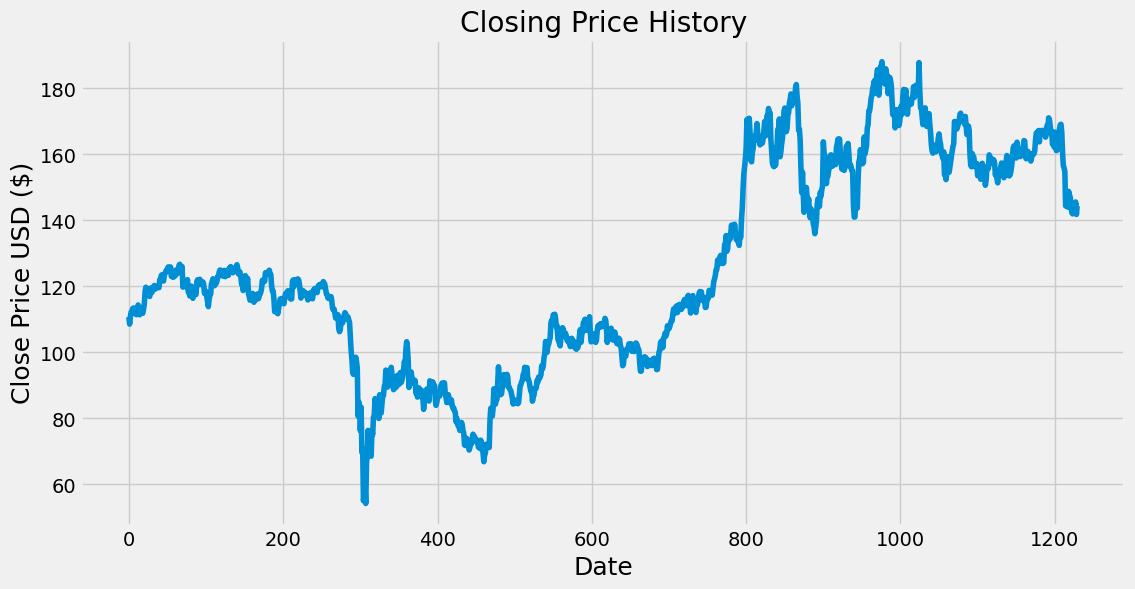

In [6]:
# Visualize the closing price history
plt.figure(figsize=(12, 6))
plt.title('Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.show()

In [7]:
# Create a new dataframe with only the Close column
data = data.filter(['Close'])
# Convert the data frame to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

985

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.42195322],
       [0.40603751],
       [0.42284988],
       ...,
       [0.65418815],
       [0.67428828],
       [0.6736905 ]])

In [33]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.42195322, 0.40603751, 0.42284988, 0.43368453, 0.42994844,
       0.44115669, 0.44250168, 0.43577673, 0.42964956, 0.43263842,
       0.42725846, 0.43136815, 0.4494508 , 0.43420758, 0.42710902,
       0.44302473, 0.4408578 , 0.43293731, 0.43047149, 0.43928865,
       0.451543  , 0.47933946, 0.48950161, 0.48763356, 0.48307554,
       0.47829336, 0.47343645, 0.46865426, 0.48195472, 0.48823134,
       0.47777031, 0.48658746, 0.48628858, 0.49353658, 0.48501831,
       0.48688635, 0.48867967, 0.49107076, 0.49211686, 0.48838078,
       0.50661287, 0.50736008, 0.51610252, 0.51782112, 0.50601509,
       0.503624  , 0.51856833, 0.52066054, 0.52633939, 0.52581633,
       0.53112157, 0.53538071, 0.53089741, 0.52656355, 0.53530599,
       0.51453336, 0.51303893, 0.52230442, 0.51236644, 0.51401031])]
[0.5152805798400957]

[array([0.42195322, 0.40603751, 0.42284988, 0.43368453, 0.42994844,
       0.44115669, 0.44250168, 0.43577673, 0.42964956, 0.43263842,
       0.42725846, 0.43136815, 0.449

In [34]:
# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
# Reshape the data # show to -dimentional but LSTM allow 3-dimentional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(925, 60, 1)

In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
# Compile the model

model.compile(optimizer='adam', loss= 'mean_squared_error')

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Train the model
model.fit(x_train, y_train, batch_size= 1, epochs= 1)

925/925 [==============================] - 23s 21ms/step - loss: 0.0028


In [40]:
# Lets create the testing data set
# Create a new array containg scaled values from index 925 to 1231
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_tests and y-test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [41]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [42]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 13ms/step


In [78]:
# Get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

1.5666879073972602

The Mean Absolute Error (MAE) is calculated as the average of the absolute differences between predicted and true values. The formula for MAE is:

MAE= 
n
∑ 
i=1
n
​
 ∣y 
pred
​
 −y 
true
​
 ∣
​


In [79]:
# Get the Mean Absolute Error (MAE) 
mae = np.mean(np.abs(predictions - y_test))
mae

3.0058097851760976

In [81]:
# Get R^2

# Calculate the mean of the true values
mean_true_values = np.mean(y_test)

# Calculate the total sum of squares
total_sum_of_squares = np.sum((y_test - mean_true_values)**2)

# Calculate the residual sum of squares
residual_sum_of_squares = np.sum((y_test - predictions)**2)

# Calculate R^2
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

r_squared

0.8046798538291212

Plot the predicted Stock data and actual stock price in the same graph

C:\Users\sanud\AppData\Local\Temp\ipykernel_12128\3252046270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


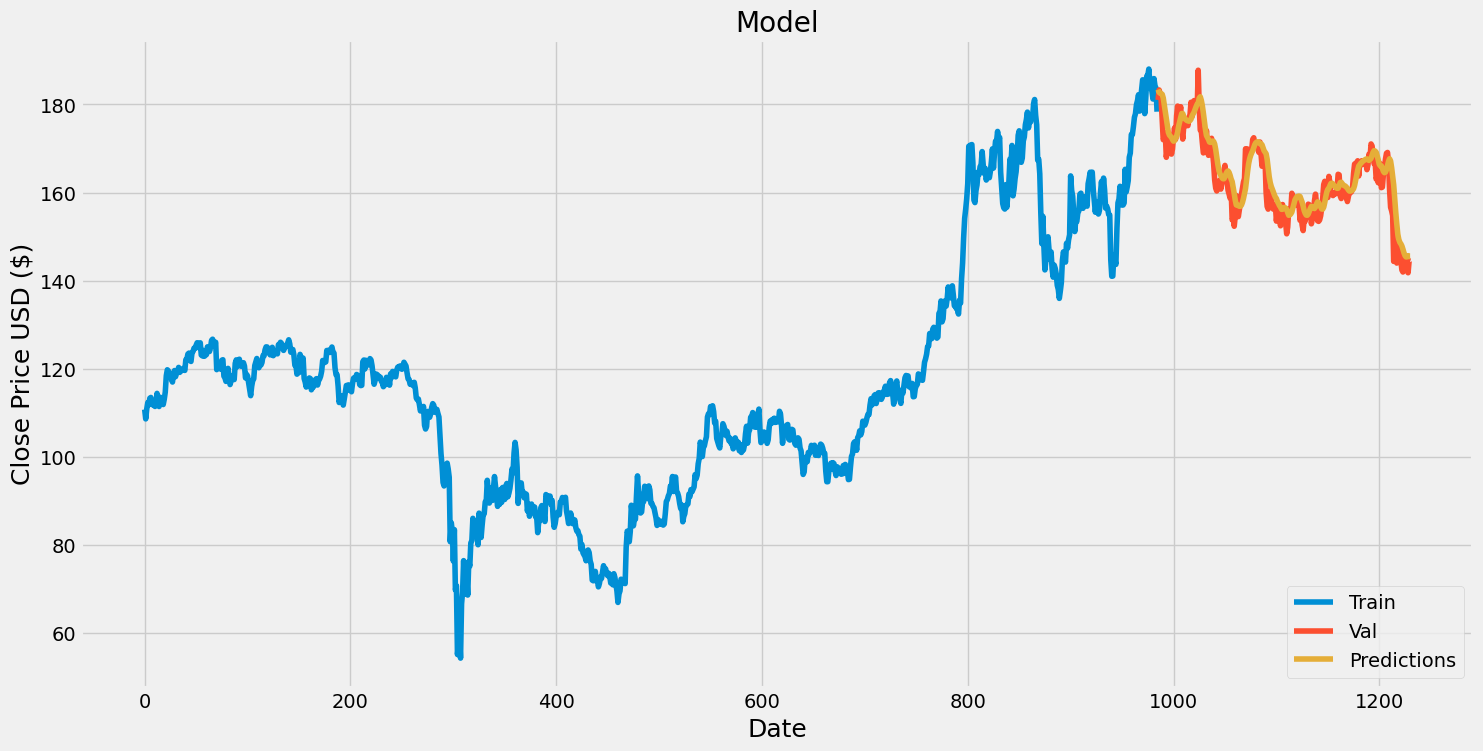

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')

Predict the future 15 days and plot output

In [46]:
len(test_data)

306

In [47]:
x_input = test_data[256:].reshape(1, -1)
x_input.shape

(1, 50)

In [48]:
temp_input = list(x_input)
temp_input =temp_input[0].tolist()

In [51]:
temp_input

[0.8412164686542629,
 0.8366584472838674,
 0.8443547784502727,
 0.8389748187999699,
 0.8443547784502727,
 0.8441306134648434,
 0.8403945303743554,
 0.8291862811028916,
 0.8372562205783456,
 0.8554883060599268,
 0.8486886348352387,
 0.8728237315997907,
 0.8694612568183517,
 0.8547410894418292,
 0.8391989837853993,
 0.8421131285959798,
 0.8130464021519839,
 0.8194724650676228,
 0.8069939475453933,
 0.8406186953597847,
 0.8391989837853993,
 0.7986251214227003,
 0.7995217813644175,
 0.8206680116565792,
 0.8306807143390866,
 0.8470447582754241,
 0.8569827392961218,
 0.8584024508705073,
 0.8414406336396922,
 0.7954120899648807,
 0.765299260255548,
 0.759470970634387,
 0.7511768661735037,
 0.6734663378913546,
 0.6863931853844429,
 0.6837032055592915,
 0.6706269147425838,
 0.7063438690876485,
 0.6978255996413361,
 0.6932675782709408,
 0.6739146678622132,
 0.6588208921766419,
 0.6554584173952027,
 0.6629305835761787,
 0.6708510797280132,
 0.6786968542180378,
 0.6824329373085258,
 0.654188149144

In [73]:
# Demontrate predictions for next 10 days

from numpy import array

lst_output =[]
n_steps = 50
i = 0
while(i < 15):
    if(len(temp_input)>50):
        # print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input= x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())

print(lst_output)



0 day input [0.8130464  0.81947247 0.80699395 0.8406187  0.83919898 0.79862512
 0.79952178 0.82066801 0.83068071 0.84704476 0.85698274 0.85840245
 0.84144063 0.79541209 0.76529926 0.75947097 0.75117687 0.67346634
 0.68639319 0.68370321 0.67062691 0.70634387 0.6978256  0.69326758
 0.67391467 0.65882089 0.65545842 0.66293058 0.67085108 0.67869685
 0.68243294 0.65418815 0.67428828 0.6736905  0.68239301 0.68419725
 0.68658543 0.68924242 0.69199944 0.69476753 0.697501   0.70017868
 0.70279127 0.70533693 0.70781779 0.71023846 0.71260405 0.7149204
 0.71719301 0.71942806]
0 day output [[0.7216302]]
1 day input [0.81947247 0.80699395 0.8406187  0.83919898 0.79862512 0.79952178
 0.82066801 0.83068071 0.84704476 0.85698274 0.85840245 0.84144063
 0.79541209 0.76529926 0.75947097 0.75117687 0.67346634 0.68639319
 0.68370321 0.67062691 0.70634387 0.6978256  0.69326758 0.67391467
 0.65882089 0.65545842 0.66293058 0.67085108 0.67869685 0.68243294
 0.65418815 0.67428828 0.6736905  0.68239301 0.68419725

Calculate the new day to predicted day

In [72]:
day_new = np.arange(1,51)
day_pred = np.arange(51,61)

In [74]:
len(lst_output)

15

In [69]:
import matplotlib.pyplot as plt
df3 = data.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [71]:
plt.plot(day_new,scaler.inverse_transform(data[1281:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of a Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

In [37]:
valid

,Close,Predictions
985,181.02,180.773743
986,183.30,180.166824
987,182.49,179.865509
988,181.02,179.669601
989,176.55,179.414078
...,...,...
1226,145.05,142.780136
1227,145.55,142.711655
1228,141.77,142.871490
1229,144.46,142.776062


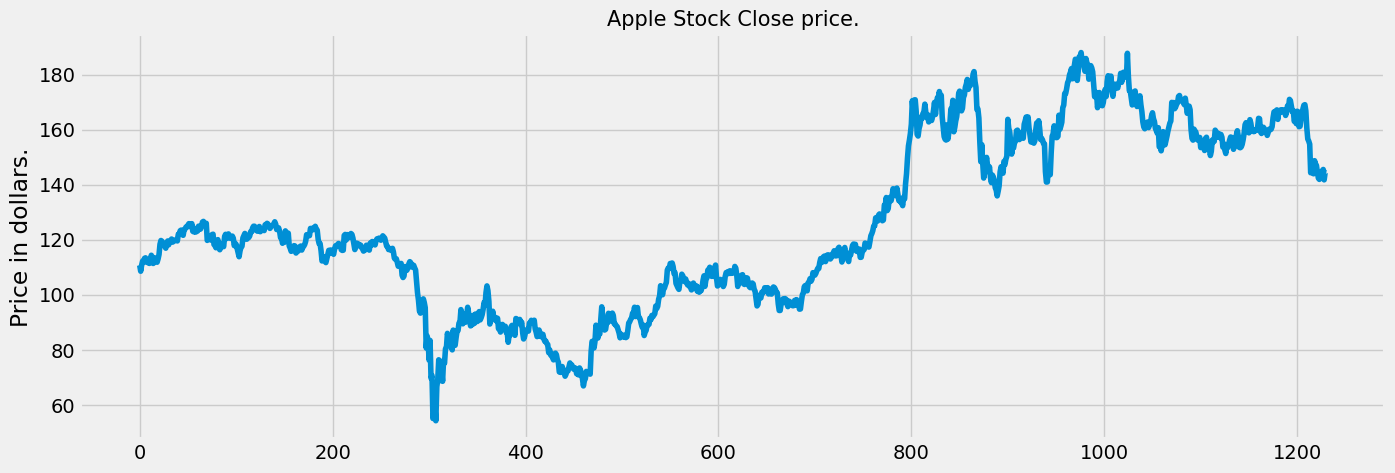

In [38]:
plt.figure(figsize=(15,5))

plt.plot(data['Close'])

plt.title('Apple Stock Close price.', fontsize=15)

plt.ylabel('Price in dollars.')
plt.show()

The prices of Apple stock are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [25]:
data.head(10)


,Close
0,76.95
1,75.01
2,78.76
3,81.47
4,82.82
5,82.97
6,82.81
7,82.02
8,80.86
9,83.72


In [15]:
data[data['Close'] == data['Adj Close']].shape

(7, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [25]:
data = data.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

In [16]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This implies that there are no null values in the data set provided.

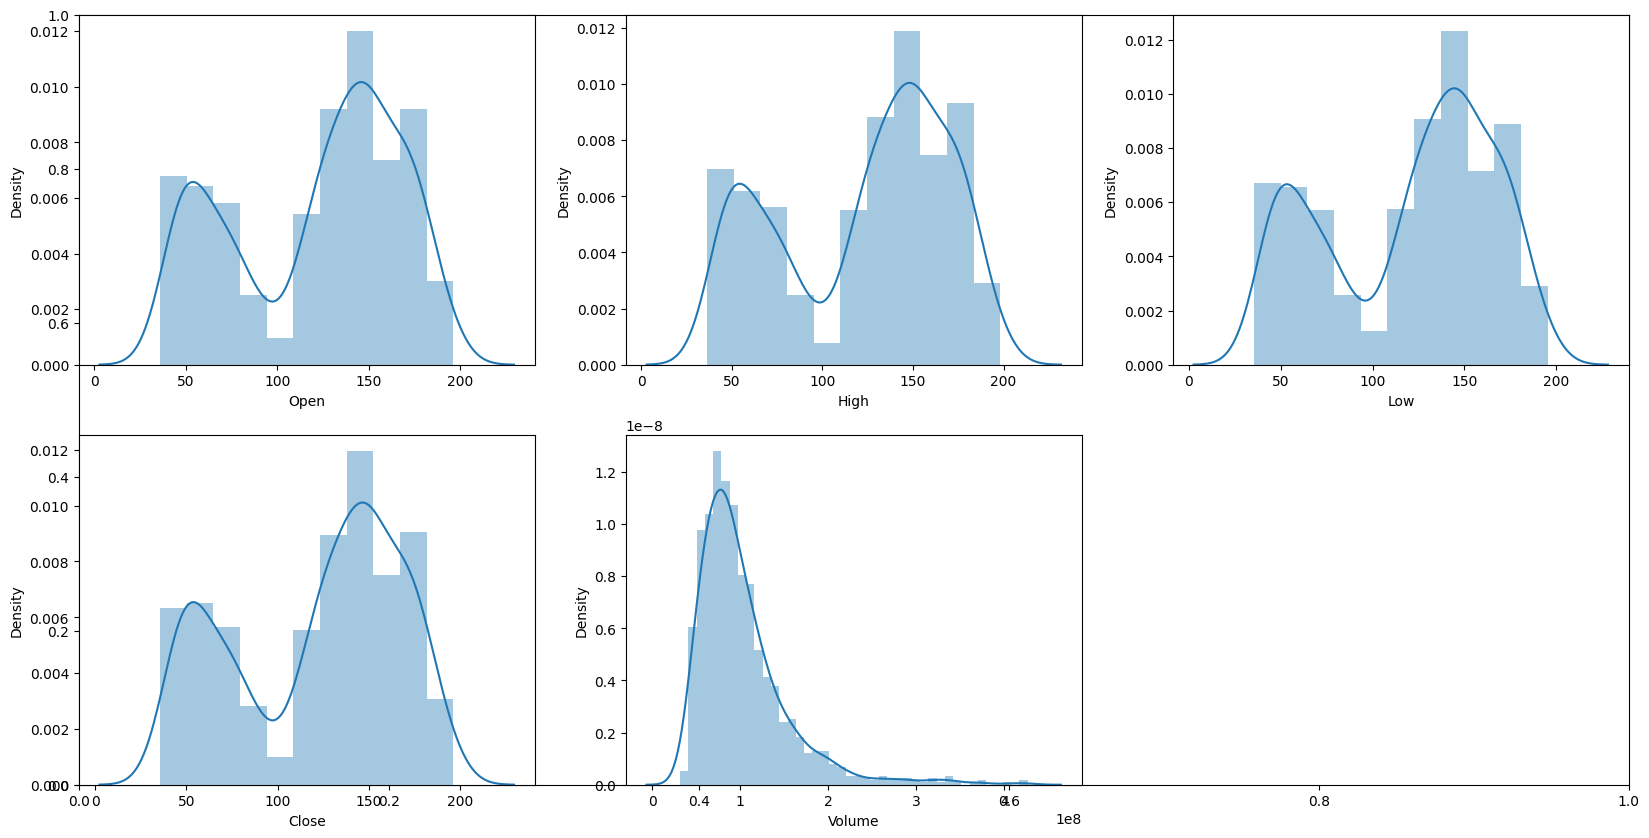

In [22]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 

plt.subplots(figsize=(20,10))
 

for i, col in enumerate(features):

  plt.subplot(2,3,i+1)

  sb.distplot(data[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

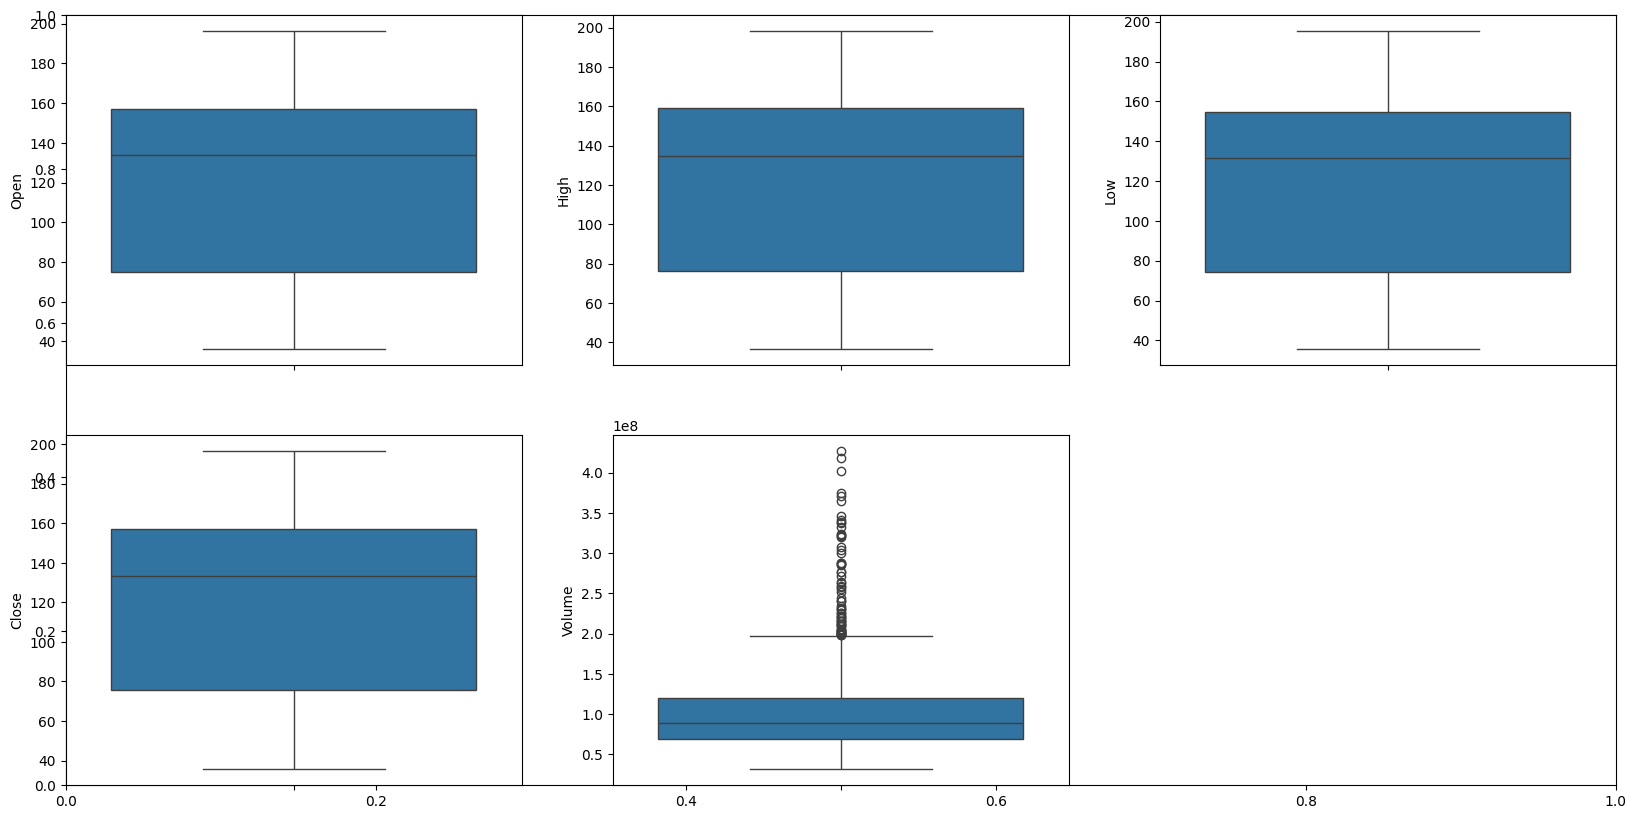

In [24]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):

  plt.subplot(2,3,i+1)

  sb.boxplot(data[col])
plt.show()